# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [2]:
# Define a function to load data and aggregate them

def extractDataFromCsvs(filePath, stock_files):
    dataframes = []
    for file in stock_files:
        df = pd.read_csv(os.path.join(filePath, file))
        df['Company'] = file.split('/')[-1].split('_')[0]
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [3]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files

filePath = r"C:\Users\Asus\Downloads\RNN_Stock_Starter_Dataset\RNN_Stock_Starter_Dataset\RNN_Stocks_Data"
stock_files = ['AMZN_stocks_data.csv', 'GOOGL_stocks_data.csv', 'IBM_stocks_data.csv', 'MSFT_stocks_data.csv']

stocks_df = extractDataFromCsvs(filePath, stock_files)
stocks_df

Date   Open   High    Low  Close    Volume  Name Company
0      2006-01-03  47.47  47.85  46.25  47.58   7582127  AMZN    AMZN
1      2006-01-04  47.48  47.73  46.69  47.25   7440914  AMZN    AMZN
2      2006-01-05  47.16  48.20  47.11  47.65   5417258  AMZN    AMZN
3      2006-01-06  47.97  48.58  47.32  47.87   6154285  AMZN    AMZN
4      2006-01-09  46.55  47.10  46.40  47.08   8945056  AMZN    AMZN
...           ...    ...    ...    ...    ...       ...   ...     ...
12072  2017-12-22  85.40  85.63  84.92  85.51  14145841  MSFT    MSFT
12073  2017-12-26  85.31  85.53  85.03  85.40   9891237  MSFT    MSFT
12074  2017-12-27  85.65  85.98  85.22  85.71  14678025  MSFT    MSFT
12075  2017-12-28  85.90  85.93  85.55  85.72  10594344  MSFT    MSFT
12076  2017-12-29  85.63  86.05  85.50  85.54  18717406  MSFT    MSFT

[12077 rows x 8 columns]

In [4]:
# View specifics of the data

stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     12077 non-null  object 
 1   Open     12076 non-null  float64
 2   High     12077 non-null  float64
 3   Low      12076 non-null  float64
 4   Close    12077 non-null  float64
 5   Volume   12077 non-null  int64  
 6   Name     12077 non-null  object 
 7   Company  12077 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 754.9+ KB


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [5]:
# Handle Missing Values

stocks_df.isnull().sum()

Date       0
Open       1
High       0
Low        1
Close      0
Volume     0
Name       0
Company    0
dtype: int64

In [6]:
stocks_df.dropna(inplace=True)
stocks_df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Name       0
Company    0
dtype: int64

In [7]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12076 entries, 0 to 12076
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     12076 non-null  object 
 1   Open     12076 non-null  float64
 2   High     12076 non-null  float64
 3   Low      12076 non-null  float64
 4   Close    12076 non-null  float64
 5   Volume   12076 non-null  int64  
 6   Name     12076 non-null  object 
 7   Company  12076 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 849.1+ KB


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

In [8]:
# Frequency distribution of volumes

stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

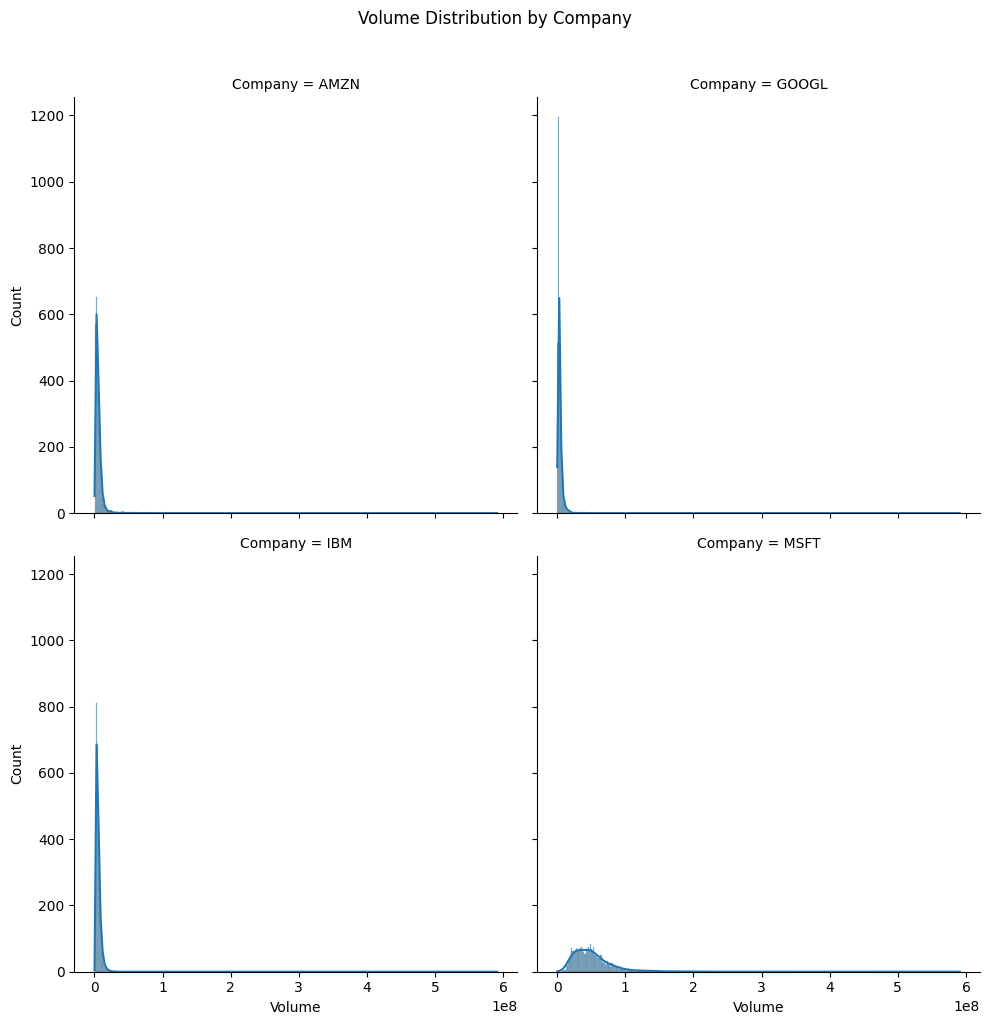

In [9]:
sns.displot(data=stocks_df, x='Volume', col='Company', col_wrap=2, kde=True)
plt.suptitle("Volume Distribution by Company", y=1.02)
plt.tight_layout()
plt.show()

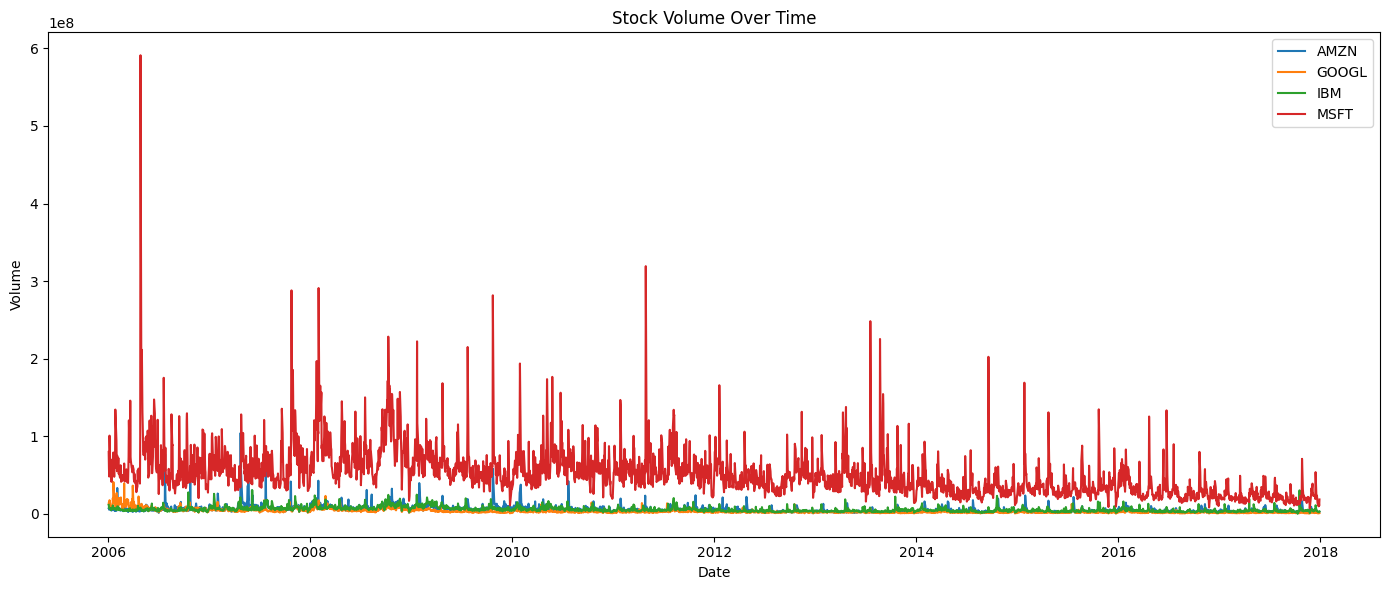

In [10]:
# Stock volume variation over time

plt.figure(figsize=(14, 6))
for company in stocks_df['Company'].unique():
    subset = stocks_df[stocks_df['Company'] == company]
    plt.plot(subset['Date'], subset['Volume'], label=company)
plt.title("Stock Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.tight_layout()
plt.show()

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

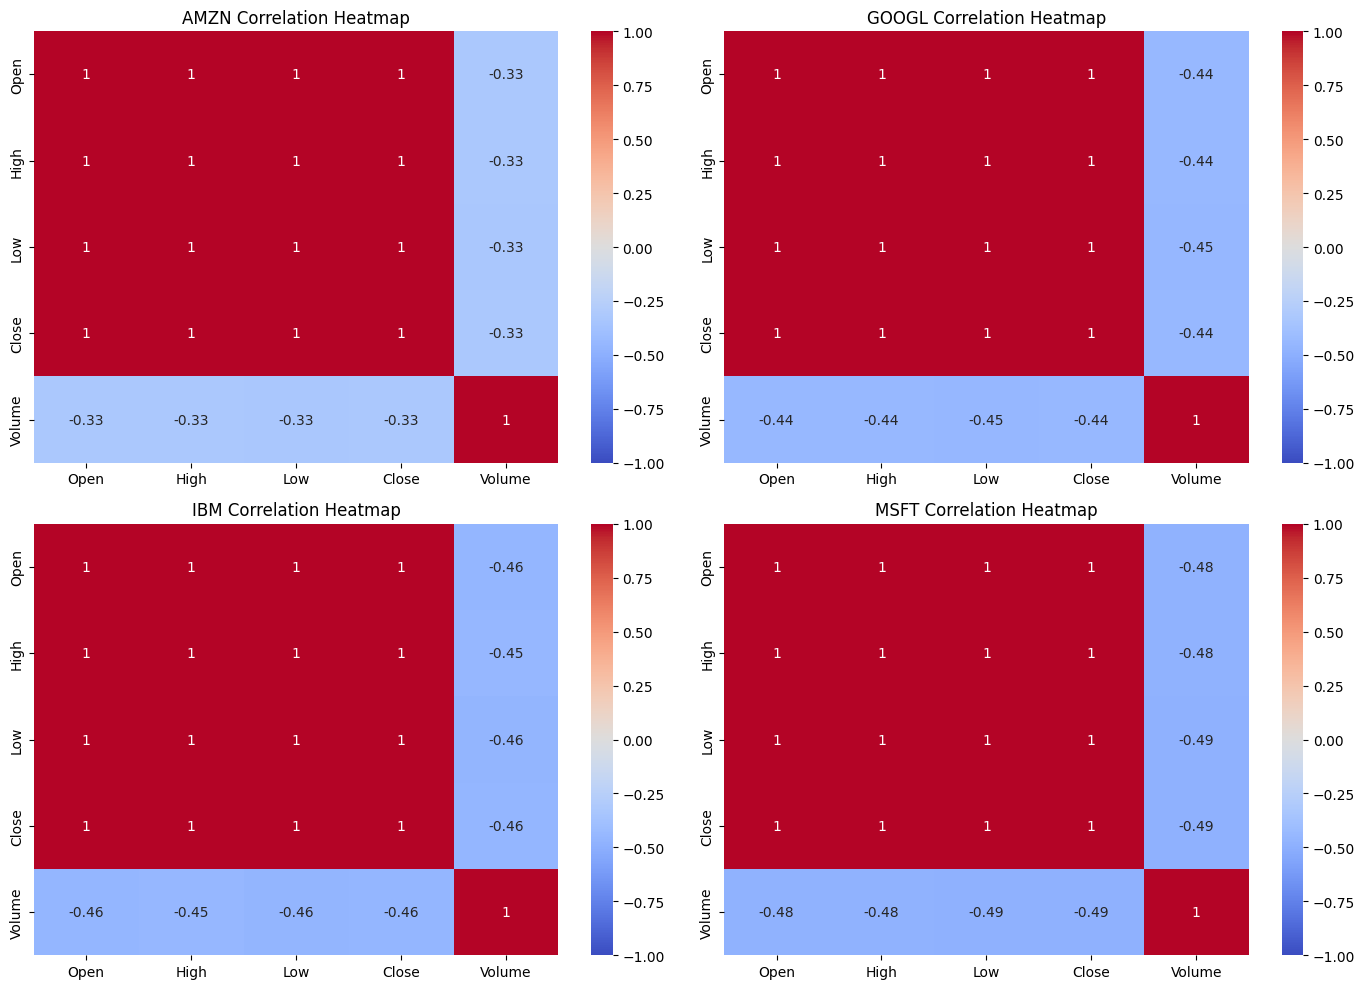

In [11]:
# Analyse correlations

plt.figure(figsize=(14, 10))
companies = stocks_df['Company'].unique()

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company_df = stocks_df[stocks_df['Company'] == company]
    corr = company_df.select_dtypes(include='number').corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{company} Correlation Heatmap')

plt.tight_layout()
plt.show()

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [12]:
# Define a function that divides the data into windows and generates target variable values for each window

def create_windowed_data(stocks_df, window_size, step_size, target_companies):
    X_windows = []
    y_windows = []

    # Sort and reset index
    df_sorted = stocks_df.sort_values(['Company', 'Date']).reset_index(drop=True)
    
    # Group by company for individual time series
    grouped = df_sorted.groupby('Company')

    for company in target_companies:
        if company not in grouped.groups:
            continue
        
        company_df = grouped.get_group(company).reset_index(drop=True)
        
        for start in range(0, len(company_df) - window_size, step_size):
            end = start + window_size
            window = company_df.iloc[start:end]
            if len(window) == window_size:
                X_windows.append(window.drop(columns=['Date', 'Name', 'Company']))
                y_windows.append(company_df.loc[end, 'Close'])  # Predict close *after* window ends

    return X_windows, y_windows

In [13]:
window_size = 10
step_size = 1

X_windows, y_windows = create_windowed_data(stocks_df, window_size, step_size, companies)

# Inspect one example
print("Sample X window:\n", X_windows[0])
print("\nTarget y value:", y_windows[0])

Sample X window:
     Open   High    Low  Close   Volume
0  47.47  47.85  46.25  47.58  7582127
1  47.48  47.73  46.69  47.25  7440914
2  47.16  48.20  47.11  47.65  5417258
3  47.97  48.58  47.32  47.87  6154285
4  46.55  47.10  46.40  47.08  8945056
5  46.41  46.75  45.36  45.65  9686957
6  45.65  45.70  44.26  44.93  8497383
7  44.79  45.09  44.09  44.36  5818301
8  44.48  44.85  44.00  44.40  4432237
9  43.95  44.32  43.66  44.00  5635225

Target y value: 44.32


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [14]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

def scale_windowed_data(X_windows):
    scaler = StandardScaler()
    
    # Fit incrementally using partial_fit
    for window in X_windows:
        scaler.partial_fit(window.values)

    # Now scale each window
    X_scaled_windows = [scaler.transform(window.values) for window in X_windows]
    
    return X_scaled_windows, scaler

In [15]:
X_scaled, scaler = scale_windowed_data(X_windows)

# Inspect
print("Scaled shape:", X_scaled[0].shape)
print("Scaled sample:\n", X_scaled[0])

Scaled shape: (10, 5)
Scaled sample:
 [[-0.76123116 -0.76295808 -0.76347469 -0.76099608 -0.355591  ]
 [-0.76118872 -0.76346375 -0.76159201 -0.76239679 -0.36108135]
 [-0.7625466  -0.76148322 -0.75979491 -0.76069896 -0.43976092]
 [-0.75910948 -0.75988193 -0.75889636 -0.75976515 -0.41110537]
 [-0.76513505 -0.76611851 -0.76283287 -0.76311837 -0.30260044]
 [-0.76572912 -0.76759338 -0.76728284 -0.76918813 -0.27375539]
 [-0.76895407 -0.77201798 -0.77198954 -0.77224424 -0.32000593]
 [-0.77260336 -0.77458846 -0.77271694 -0.77466365 -0.4241684 ]
 [-0.7739188  -0.7755998  -0.77310203 -0.77449387 -0.47805845]
 [-0.77616778 -0.77783317 -0.77455683 -0.7761917  -0.43128638]]


Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [16]:
# Define a function to create input and output data points from the master DataFrame

def prepare_data(stocks_df, target_companies, window_size, step_size, test_size=0.2):
    """
    Main function to prepare windowed, scaled, and split data for RNN training
    
    Parameters:
    - stocks_df: Combined dataframe with all stock data
    - target_companies: List of companies to predict
    - window_size: Size of each window
    - step_size: Step size for sliding window
    - test_size: Proportion of data for testing
    
    Returns:
    - X_train, y_train, X_test, y_test: Scaled training and testing data
    - scaler: Fitted scaler object
    """
    
    # Create windowed data
    X_windows, y_windows = create_windowed_data(stocks_df, window_size, step_size, target_companies)
    
    # Scale the windowed data
    X_scaled, scaler = scale_windowed_data(X_windows)
    
    # Convert to numpy arrays
    X = np.array(X_scaled)
    y = np.array(y_windows)
    
    # Train-test split
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    return X_train, y_train, X_test, y_test, scaler


We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

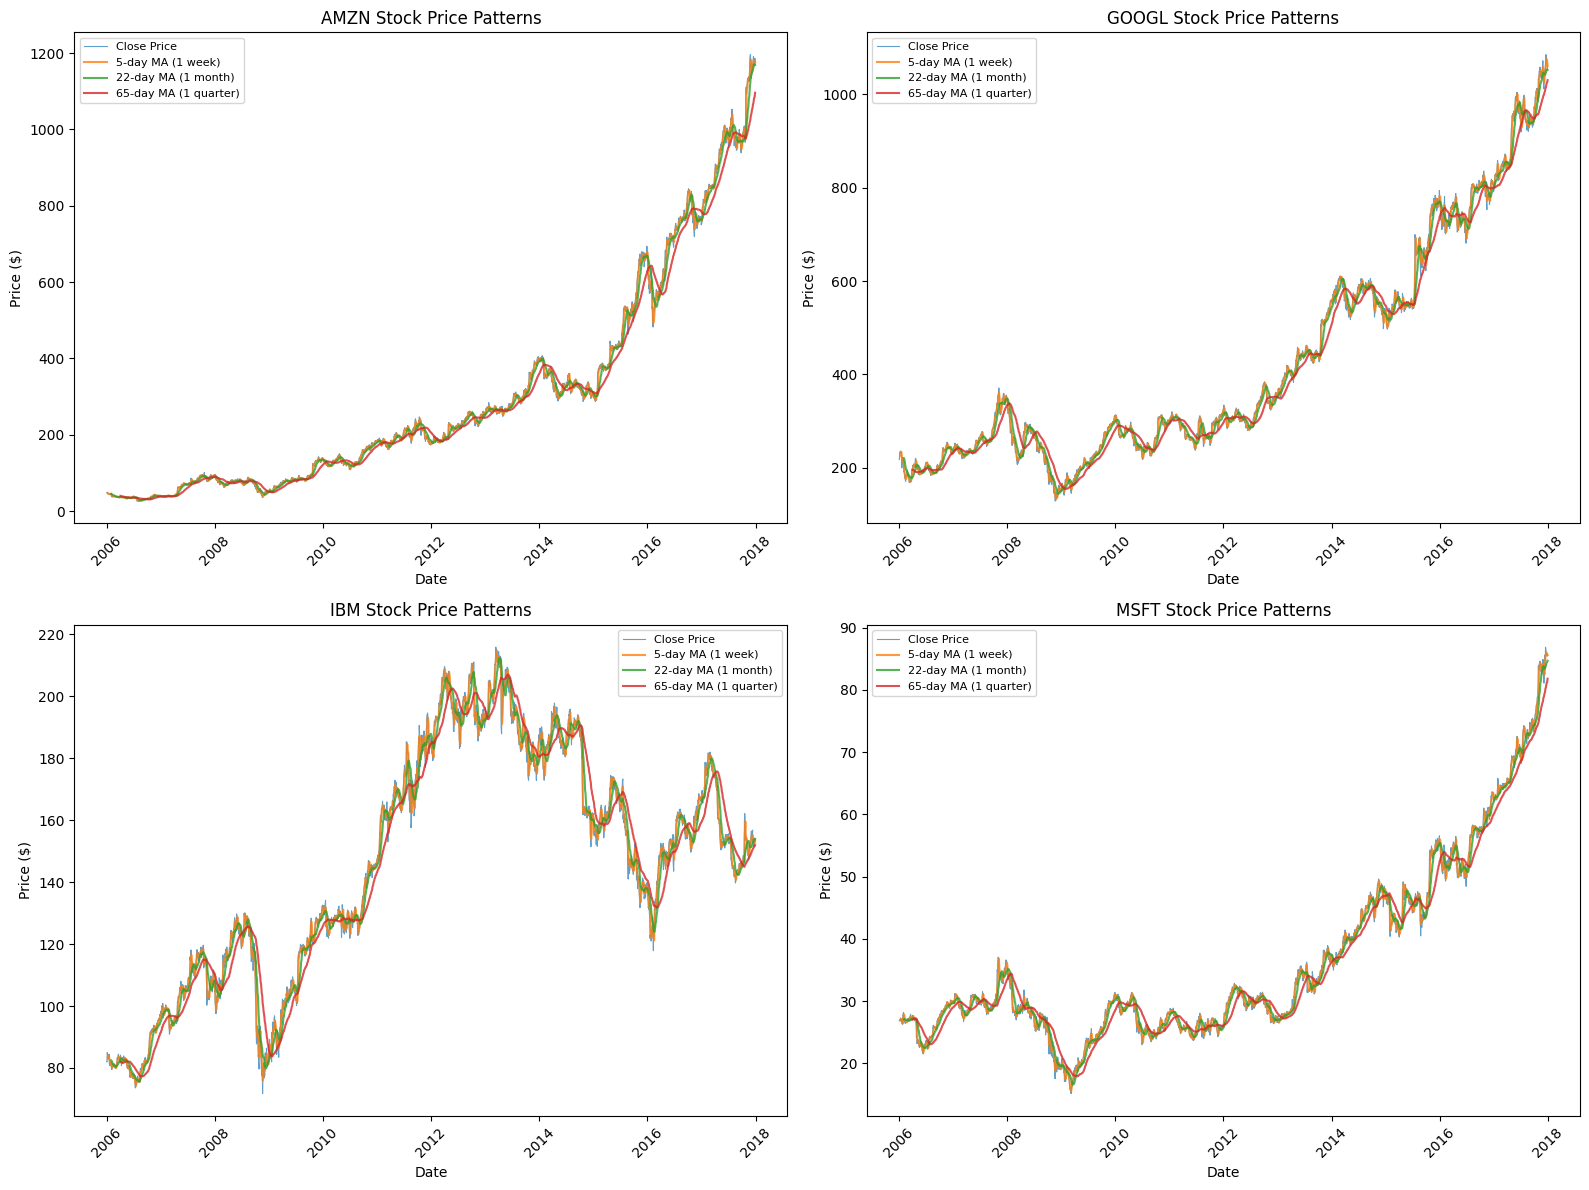

Window Size Analysis for Financial Data:
• 5 days (1 week): Captures very short-term trends
• 10-15 days (2-3 weeks): Good for short-term momentum
• 20-22 days (1 month): Captures monthly business cycles
• 65 days (1 quarter): Captures quarterly earnings patterns


In [44]:
# Checking for patterns in different sequence lengths

plt.figure(figsize=(16, 12))

# Analyze each company separately
companies = stocks_df['Company'].unique()

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company_data = stocks_df[stocks_df['Company'] == company].copy()
    company_data = company_data.sort_values('Date').reset_index(drop=True)
    
    # Plot closing prices over time
    plt.plot(company_data['Date'], company_data['Close'], alpha=0.7, label='Close Price', linewidth=0.8)
    
    # Add moving averages to see patterns at different time scales
    company_data['MA_5'] = company_data['Close'].rolling(window=5).mean()   # 1 week (5 business days)
    company_data['MA_22'] = company_data['Close'].rolling(window=22).mean() # 1 month (22 business days)
    company_data['MA_65'] = company_data['Close'].rolling(window=65).mean() # 1 quarter (65 business days)
    
    plt.plot(company_data['Date'], company_data['MA_5'], alpha=0.8, label='5-day MA (1 week)')
    plt.plot(company_data['Date'], company_data['MA_22'], alpha=0.8, label='22-day MA (1 month)')
    plt.plot(company_data['Date'], company_data['MA_65'], alpha=0.8, label='65-day MA (1 quarter)')
    
    plt.title(f'{company} Stock Price Patterns')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend(fontsize=8)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analyze which window size shows good patterns
print("Window Size Analysis for Financial Data:")
print("=" * 50)
print("• 5 days (1 week): Captures very short-term trends")
print("• 10-15 days (2-3 weeks): Good for short-term momentum")
print("• 20-22 days (1 month): Captures monthly business cycles")
print("• 65 days (1 quarter): Captures quarterly earnings patterns")


#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [18]:
# Create data instances from the master data frame using decided window size and window stride

WINDOW_SIZE = 20
STEP_SIZE = 1
TEST_SIZE = 0.2

# For single target prediction, let's start with AMZN
target_companies = ['AMZN']

print("Creating datasets for single target prediction...")
print(f"Target company: {target_companies[0]}")
print(f"Window size: {WINDOW_SIZE} days")
print(f"Step size: {STEP_SIZE}")
print(f"Test size: {TEST_SIZE * 100}%")
print()

# Create the training and testing datasets
X_train, y_train, X_test, y_test, scaler = prepare_data(
    stocks_df, 
    target_companies, 
    WINDOW_SIZE, 
    STEP_SIZE, 
    TEST_SIZE
)

print(f"\nDataset created successfully!")
print(f"Feature shape per window: {X_train.shape[1:]} (timesteps, features)")
print(f"Features: Open, High, Low, Close, Volume")


Creating datasets for single target prediction...
Target company: AMZN
Window size: 20 days
Step size: 1
Test size: 20.0%

Training data shape: X_train: (2399, 20, 5), y_train: (2399,)
Testing data shape: X_test: (600, 20, 5), y_test: (600,)

Dataset created successfully!
Feature shape per window: (20, 5) (timesteps, features)
Features: Open, High, Low, Close, Volume


In [19]:
# Check the number of data points generated

print("Data Points Summary:")
print("=" * 40)
print(f"Total windows created: {len(X_train) + len(X_test)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print()
print("Data Shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print()
print("Data Configuration:")
print(f"Timesteps per window: {X_train.shape[1]}")
print(f"Features per timestep: {X_train.shape[2]}")
print(f"Train/Test split: {len(X_train)/(len(X_train)+len(X_test))*100:.1f}% / {len(X_test)/(len(X_train)+len(X_test))*100:.1f}%")

Data Points Summary:
Total windows created: 2999
Training samples: 2399
Testing samples: 600

Data Shapes:
X_train shape: (2399, 20, 5)
y_train shape: (2399,)
X_test shape: (600, 20, 5)
y_test shape: (600,)

Data Configuration:
Timesteps per window: 20
Features per timestep: 5
Train/Test split: 80.0% / 20.0%


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [20]:
# Check if the datasets are compatible inputs to neural networks

print("Neural Network Compatibility Check:")
print("=" * 50)

# Check data types
print("Data Types:")
print(f"X_train: {X_train.dtype}")
print(f"y_train: {y_train.dtype}")
print(f"X_test: {X_test.dtype}")
print(f"y_test: {y_test.dtype}")
print()

# Check for missing or infinite values
print("Data Quality Check:")
print(f"X_train - NaN values: {np.isnan(X_train).sum()}")
print(f"y_train - NaN values: {np.isnan(y_train).sum()}")
print(f"X_test - NaN values: {np.isnan(X_test).sum()}")
print(f"y_test - NaN values: {np.isnan(y_test).sum()}")
print()
print(f"X_train - Infinite values: {np.isinf(X_train).sum()}")
print(f"y_train - Infinite values: {np.isinf(y_train).sum()}")
print(f"X_test - Infinite values: {np.isinf(X_test).sum()}")
print(f"y_test - Infinite values: {np.isinf(y_test).sum()}")
print()

# Check RNN input format
print("RNN Input Format Check:")
print(f"X_train shape: {X_train.shape} → (samples, timesteps, features)")
print(f"y_train shape: {y_train.shape} → (samples,)")
print(f"Correct 3D format for RNN: {'Yes' if len(X_train.shape) == 3 else 'No'}")
print()

# Check data ranges
print("Data Range After Scaling:")
print(f"X_train range: [{X_train.min():.3f}, {X_train.max():.3f}]")
print(f"y_train range: [{y_train.min():.2f}, {y_train.max():.2f}]")
print()

# Sample data preview
print("Sample Data Preview:")
print("First window (first 3 timesteps):")
print(X_train[0][:3])
print(f"Corresponding target: ${y_train[0]:.2f}")
print()
print("READY FOR NEURAL NETWORK TRAINING!")
print("Proper data types (float)")
print("No missing or infinite values")
print("Correct 3D shape for RNN input")
print("Scaled features for stable training")
print("Sequential time series structure maintained")


Neural Network Compatibility Check:
Data Types:
X_train: float64
y_train: float64
X_test: float64
y_test: float64

Data Quality Check:
X_train - NaN values: 0
y_train - NaN values: 0
X_test - NaN values: 0
y_test - NaN values: 0

X_train - Infinite values: 0
y_train - Infinite values: 0
X_test - Infinite values: 0
y_test - Infinite values: 0

RNN Input Format Check:
X_train shape: (2399, 20, 5) → (samples, timesteps, features)
y_train shape: (2399,) → (samples,)
Correct 3D format for RNN: Yes

Data Range After Scaling:
X_train range: [-0.987, 19.183]
y_train range: [26.07, 537.01]

Sample Data Preview:
First window (first 3 timesteps):
[[-0.90500842 -0.90899618 -0.90465443 -0.9051918   0.31977898]
 [-0.90497216 -0.90942859 -0.90304635 -0.90638888  0.29226765]
 [-0.90613243 -0.90773496 -0.90151137 -0.90493788 -0.10198411]]
Corresponding target: $43.98

READY FOR NEURAL NETWORK TRAINING!
Proper data types (float)
No missing or infinite values
Correct 3D shape for RNN input
Scaled feature

## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [21]:
# Create a function that creates a simple RNN model according to the model configuration arguments

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def create_simple_rnn_model(input_shape, rnn_units=50, dropout_rate=0.2, learning_rate=0.001, dense_units=1):
    """
    Creates a Simple RNN model with configurable parameters
    
    Parameters:
    - input_shape: Shape of input data (timesteps, features)
    - rnn_units: Number of units in RNN layer
    - dropout_rate: Dropout rate for regularization
    - learning_rate: Learning rate for optimizer
    - dense_units: Number of units in output dense layer
    
    Returns:
    - Compiled Keras model
    """
    
    model = Sequential([
        SimpleRNN(rnn_units, 
                  input_shape=input_shape,
                  return_sequences=False,  # Only return last output
                  activation='tanh'),
        Dropout(dropout_rate),
        Dense(dense_units, activation='linear')  # Linear for regression
    ])
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',  # Mean Squared Error for regression
        metrics=['mae']  # Mean Absolute Error
    )
    
    return model

# Test the function
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
test_model = create_simple_rnn_model(input_shape)
print("Simple RNN Model Architecture:")
test_model.summary()

Simple RNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [22]:
# Find an optimal configuration of simple RNN

hyperparameters = {
    'rnn_units': [32, 50, 64],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.005],
    'batch_size': [16, 32, 64]
}

# Store results
simple_rnn_results = []

print("Starting Simple RNN Hyperparameter Tuning...")
print("=" * 60)

# Input shape for models
input_shape = (X_train.shape[1], X_train.shape[2])

# Test different combinations (limited for efficiency)
test_configs = [
    {'rnn_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_units': 50, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'batch_size': 32},
    {'rnn_units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.005, 'batch_size': 32},
]

for i, config in enumerate(test_configs, 1):
    print(f"\nTesting Configuration {i}/{len(test_configs)}:")
    print(f"RNN Units: {config['rnn_units']}, Dropout: {config['dropout_rate']}, "
          f"LR: {config['learning_rate']}, Batch Size: {config['batch_size']}")
    try:
        # Create model
        model = create_simple_rnn_model(
            input_shape=input_shape,
            rnn_units=config['rnn_units'],
            dropout_rate=config['dropout_rate'],
            learning_rate=config['learning_rate']
        )
        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=0
        )
        
        # Train model
        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=config['batch_size'],
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )
        
        # Evaluate on test set
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        y_pred = model.predict(X_test, verbose=0)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        result = {
            'config': config,
            'test_loss': test_loss[0],
            'test_mae': test_loss[1],
            'mse': mse,
            'mae': mae,
            'r2_score': r2,
            'final_epoch': len(history.history['loss'])
        }
        simple_rnn_results.append(result)
        
        print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, Epochs: {result['final_epoch']}")
        
    except Exception as e:
        print(f"Configuration failed: {str(e)}")

print(f"\nHyperparameter tuning completed!")
print(f"Tested {len(simple_rnn_results)} configurations successfully.")

Starting Simple RNN Hyperparameter Tuning...

Testing Configuration 1/7:
RNN Units: 32, Dropout: 0.2, LR: 0.001, Batch Size: 32
MSE: 669514.0245, MAE: 798.4029, R²: -19.8501, Epochs: 11

Testing Configuration 2/7:
RNN Units: 50, Dropout: 0.2, LR: 0.001, Batch Size: 32
MSE: 659189.9743, MAE: 776.4353, R²: -19.5286, Epochs: 50

Testing Configuration 3/7:
RNN Units: 64, Dropout: 0.2, LR: 0.001, Batch Size: 32
MSE: 779317.0835, MAE: 860.4794, R²: -23.2696, Epochs: 49

Testing Configuration 4/7:
RNN Units: 50, Dropout: 0.1, LR: 0.001, Batch Size: 32
MSE: 676677.6249, MAE: 802.8768, R²: -20.0732, Epochs: 11

Testing Configuration 5/7:
RNN Units: 50, Dropout: 0.3, LR: 0.001, Batch Size: 32
MSE: 683396.1479, MAE: 807.0465, R²: -20.2824, Epochs: 12

Testing Configuration 6/7:
RNN Units: 50, Dropout: 0.2, LR: 0.01, Batch Size: 32
MSE: 810047.7177, MAE: 883.7457, R²: -24.2266, Epochs: 19

Testing Configuration 7/7:
RNN Units: 50, Dropout: 0.2, LR: 0.005, Batch Size: 32
MSE: 698150.5035, MAE: 812.

In [23]:
# Find the best configuration based on evaluation metrics

if simple_rnn_results:
    # Sort by lowest MSE (best performance)
    best_simple_rnn = min(simple_rnn_results, key=lambda x: x['mse'])
    
    print("Simple RNN Hyperparameter Tuning Results:")
    print("=" * 60)
    
    # Display all results
    print("All Configurations Performance:")
    print(f"{'Config':<8} {'RNN Units':<12} {'Dropout':<10} {'LR':<8} {'Batch':<8} {'MSE':<12} {'MAE':<12} {'R²':<8}")
    print("-" * 80)
    
    for i, result in enumerate(sorted(simple_rnn_results, key=lambda x: x['mse']), 1):
        config = result['config']
        print(f"{i:<8} {config['rnn_units']:<12} {config['dropout_rate']:<10} "
              f"{config['learning_rate']:<8} {config['batch_size']:<8} "
              f"{result['mse']:<12.4f} {result['mae']:<12.4f} {result['r2_score']:<8.3f}")
    
    print("\nBEST SIMPLE RNN CONFIGURATION:")
    print("=" * 50)
    best_config = best_simple_rnn['config']
    print(f"RNN Units: {best_config['rnn_units']}")
    print(f"Dropout Rate: {best_config['dropout_rate']}")
    print(f"Learning Rate: {best_config['learning_rate']}")
    print(f"Batch Size: {best_config['batch_size']}")
    print()
    print("Performance Metrics:")
    print(f"MSE: {best_simple_rnn['mse']:.4f}")
    print(f"MAE: {best_simple_rnn['mae']:.4f}")
    print(f"R² Score: {best_simple_rnn['r2_score']:.4f}")
    print(f"Training Epochs: {best_simple_rnn['final_epoch']}")
    
    # Store best config for final model
    best_simple_rnn_config = best_config
    
else:
    print("No successful configurations found. Please check the hyperparameter tuning.")
    # Fallback configuration
    best_simple_rnn_config = {'rnn_units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32}


Simple RNN Hyperparameter Tuning Results:
All Configurations Performance:
Config   RNN Units    Dropout    LR       Batch    MSE          MAE          R²      
--------------------------------------------------------------------------------
1        50           0.2        0.001    32       659189.9743  776.4353     -19.529 
2        32           0.2        0.001    32       669514.0245  798.4029     -19.850 
3        50           0.1        0.001    32       676677.6249  802.8768     -20.073 
4        50           0.3        0.001    32       683396.1479  807.0465     -20.282 
5        50           0.2        0.005    32       698150.5035  812.1753     -20.742 
6        64           0.2        0.001    32       779317.0835  860.4794     -23.270 
7        50           0.2        0.01     32       810047.7177  883.7457     -24.227 

BEST SIMPLE RNN CONFIGURATION:
RNN Units: 50
Dropout Rate: 0.2
Learning Rate: 0.001
Batch Size: 32

Performance Metrics:
MSE: 659189.9743
MAE: 776.4353
R² S

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

Training Final Simple RNN Model with Best Configuration...
Final Simple RNN Model Architecture:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)


Training with configuration:
RNN Units: 50
Dropout: 0.2
Learning Rate: 0.001
Batch Size: 32
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 22921.5508 - mae: 129.3511 - val_loss: 132979.7656 - val_mae: 359.8661
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21792.2559 - mae: 124.4334 - val_loss: 133192.7656 - val_mae: 359.6279
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 20514.3828 - mae: 119.6407 - val_loss: 133376.5000 - val_mae: 359.4155
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19925.1504 - mae: 116.4726 - val_loss: 133542.0625 - val_mae: 359.1526
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 17978.2422 - mae: 109.2694 - val_loss: 133601.5469 - val_mae: 358.7549
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18125.8047 - mae: 108.2780 - val_loss: 133754.9844 - val_mae: 358.4878
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 18216.4160 - mae: 108.5369 - val_loss: 133985.9062 - val_mae: 358

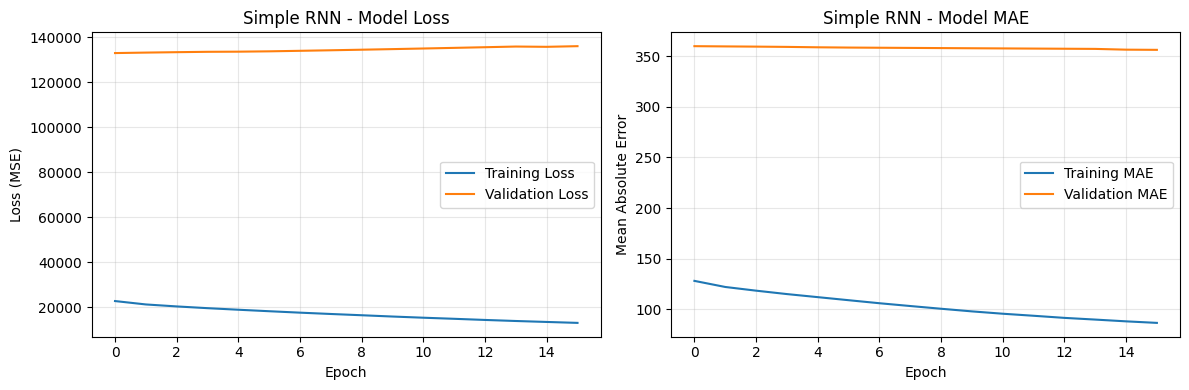

In [24]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model
print("Training Final Simple RNN Model with Best Configuration...")
print("=" * 60)

# Create the optimal model
optimal_simple_rnn = create_simple_rnn_model(
    input_shape=input_shape,
    rnn_units=best_simple_rnn_config['rnn_units'],
    dropout_rate=best_simple_rnn_config['dropout_rate'],
    learning_rate=best_simple_rnn_config['learning_rate']
)

print("Final Simple RNN Model Architecture:")
optimal_simple_rnn.summary()

# Enhanced training with callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Train the final model
print(f"\nTraining with configuration:")
print(f"RNN Units: {best_simple_rnn_config['rnn_units']}")
print(f"Dropout: {best_simple_rnn_config['dropout_rate']}")
print(f"Learning Rate: {best_simple_rnn_config['learning_rate']}")
print(f"Batch Size: {best_simple_rnn_config['batch_size']}")

simple_rnn_history = optimal_simple_rnn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=best_simple_rnn_config['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print("\nSimple RNN training completed!")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(simple_rnn_history.history['loss'], label='Training Loss')
plt.plot(simple_rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(simple_rnn_history.history['mae'], label='Training MAE')
plt.plot(simple_rnn_history.history['val_mae'], label='Validation MAE')
plt.title('Simple RNN - Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Plotting the actual vs predicted values

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


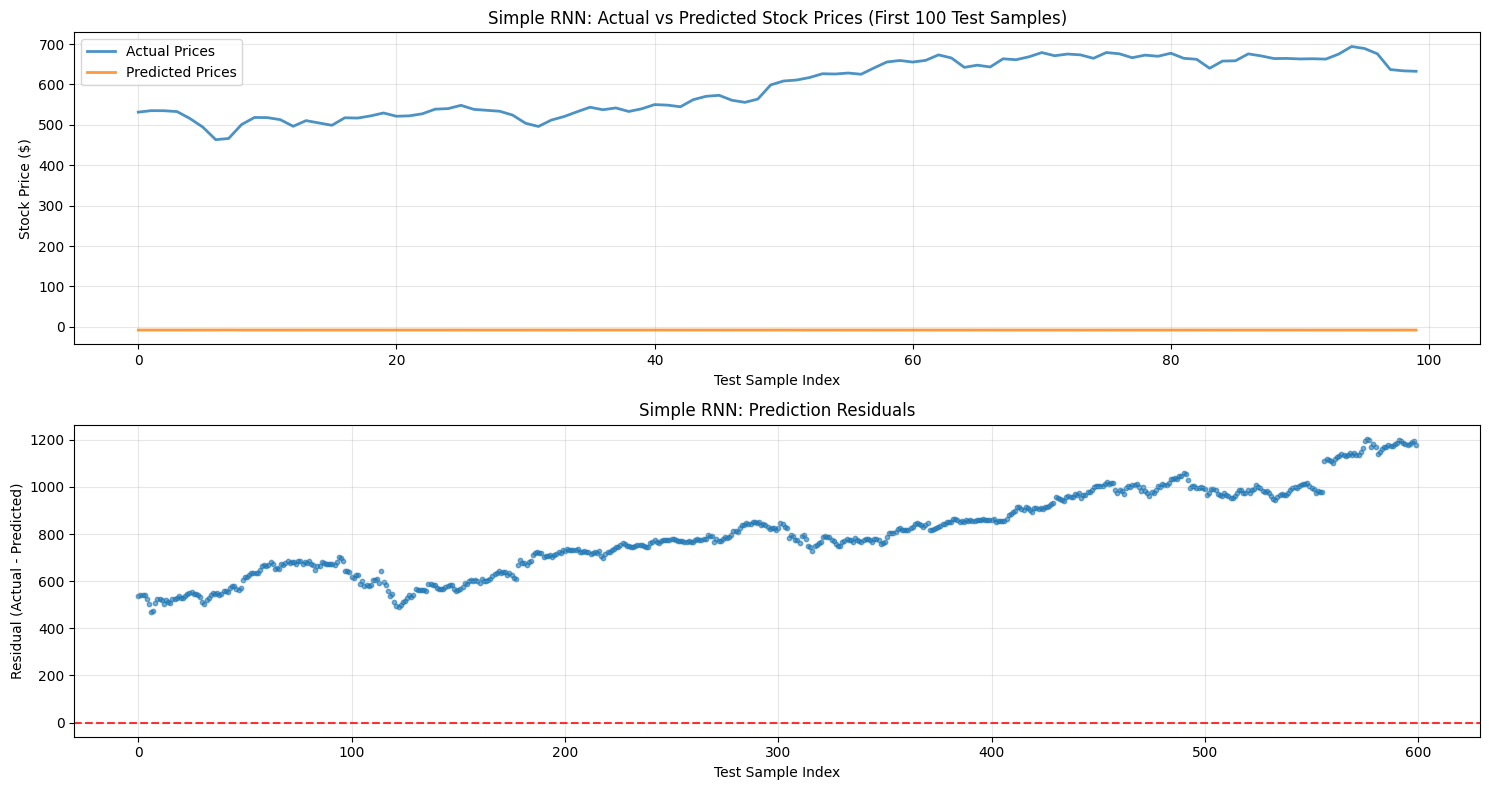

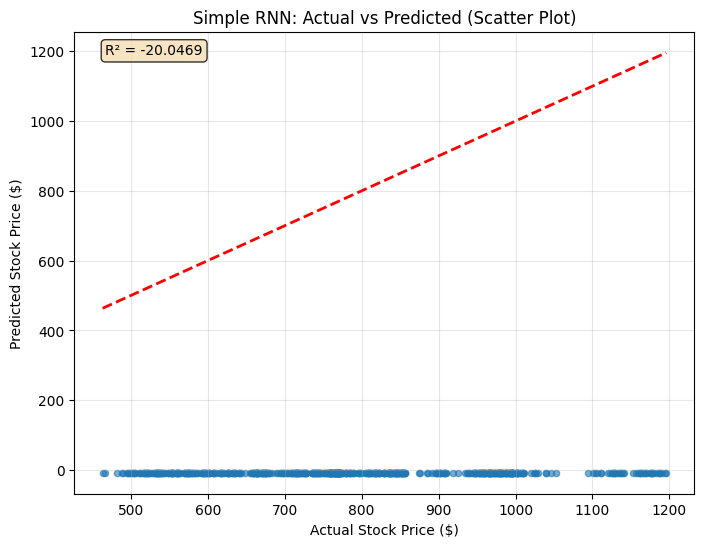

Simple RNN Prediction Summary:
Test samples plotted: 100
Total test samples: 600
Prediction range: $-7.85 - $-7.61
Actual range: $463.37 - $1195.83


In [25]:
# Predict on the test data and plot
# Make predictions
simple_rnn_predictions = optimal_simple_rnn.predict(X_test)

# Create plotting data
plt.figure(figsize=(15, 8))

# Plot actual vs predicted
plt.subplot(2, 1, 1)
plt.plot(y_test[:100], label='Actual Prices', alpha=0.8, linewidth=2)
plt.plot(simple_rnn_predictions[:100], label='Predicted Prices', alpha=0.8, linewidth=2)
plt.title('Simple RNN: Actual vs Predicted Stock Prices (First 100 Test Samples)')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot residuals
plt.subplot(2, 1, 2)
residuals = y_test - simple_rnn_predictions.flatten()
plt.scatter(range(len(residuals)), residuals, alpha=0.6, s=10)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.title('Simple RNN: Prediction Residuals')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, simple_rnn_predictions, alpha=0.6, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Stock Price ($)')
plt.ylabel('Predicted Stock Price ($)')
plt.title('Simple RNN: Actual vs Predicted (Scatter Plot)')
plt.grid(True, alpha=0.3)
r2 = r2_score(y_test, simple_rnn_predictions)
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.show()

print(f"Simple RNN Prediction Summary:")
print(f"Test samples plotted: {min(100, len(y_test))}")
print(f"Total test samples: {len(y_test)}")
print(f"Prediction range: ${simple_rnn_predictions.min():.2f} - ${simple_rnn_predictions.max():.2f}")
print(f"Actual range: ${y_test.min():.2f} - ${y_test.max():.2f}")


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [26]:
# Compute the performance of the model on the testing data set
simple_rnn_test_loss = optimal_simple_rnn.evaluate(X_test, y_test, verbose=0)
simple_rnn_mse = mean_squared_error(y_test, simple_rnn_predictions)
simple_rnn_mae = mean_absolute_error(y_test, simple_rnn_predictions)
simple_rnn_rmse = np.sqrt(simple_rnn_mse)
simple_rnn_r2 = r2_score(y_test, simple_rnn_predictions)
simple_rnn_mape = np.mean(np.abs((y_test - simple_rnn_predictions.flatten()) / y_test)) * 100
print("SIMPLE RNN MODEL PERFORMANCE")
print("=" * 50)
print(f"Test Loss (MSE): {simple_rnn_test_loss[0]:.4f}")
print(f"Test MAE: {simple_rnn_test_loss[1]:.4f}")
print()
print("Detailed Metrics:")
print(f"Mean Squared Error (MSE): {simple_rnn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {simple_rnn_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {simple_rnn_mae:.4f}")
print(f"R² Score: {simple_rnn_r2:.4f}")
print(f"Mean Absolute Percentage Error: {simple_rnn_mape:.2f}%")
print()

if simple_rnn_r2 >= 0.8:
    performance = "Excellent"
elif simple_rnn_r2 >= 0.6:
    performance = "Good"
elif simple_rnn_r2 >= 0.4:
    performance = "Moderate"
else:
    performance = "Poor"

print(f"Model Performance: {performance}")
print(f"Explained Variance: {simple_rnn_r2*100:.1f}%")
print(f"Average Prediction Error: ${simple_rnn_mae:.2f}")
print("\nModel Insights:")
print(f"The model explains {simple_rnn_r2*100:.1f}% of the variance in stock prices")
print(f"On average, predictions are off by ${simple_rnn_mae:.2f}")
print(f"Typical prediction error is {simple_rnn_mape:.1f}% of the actual price")

simple_rnn_final_results = {
    'model_name': 'Simple RNN',
    'mse': simple_rnn_mse,
    'mae': simple_rnn_mae,
    'rmse': simple_rnn_rmse,
    'r2': simple_rnn_r2,
    'mape': simple_rnn_mape,
    'config': best_simple_rnn_config
}

print(f"\nSimple RNN evaluation completed!")


SIMPLE RNN MODEL PERFORMANCE
Test Loss (MSE): 675833.0625
Test MAE: 802.3214

Detailed Metrics:
Mean Squared Error (MSE): 675833.1617
Root Mean Squared Error (RMSE): 822.0907
Mean Absolute Error (MAE): 802.3214
R² Score: -20.0469
Mean Absolute Percentage Error: 101.04%

Model Performance: Poor
Explained Variance: -2004.7%
Average Prediction Error: $802.32

Model Insights:
The model explains -2004.7% of the variance in stock prices
On average, predictions are off by $802.32
Typical prediction error is 101.0% of the actual price

Simple RNN evaluation completed!


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [27]:
# Define a function to create a model and specify default values for hyperparameters
from tensorflow.keras.layers import LSTM, GRU, Bidirectional

def create_advanced_rnn_model(input_shape, rnn_type='LSTM', rnn_units=50, num_layers=1, 
                             dropout_rate=0.2, recurrent_dropout=0.0, bidirectional=False,
                             learning_rate=0.001, dense_units=1):
    """
    Creates an Advanced RNN model (LSTM or GRU) with configurable parameters
    
    Parameters:
    - input_shape: Shape of input data (timesteps, features)
    - rnn_type: Type of RNN ('LSTM' or 'GRU')
    - rnn_units: Number of units in each RNN layer
    - num_layers: Number of RNN layers
    - dropout_rate: Dropout rate for regularization
    - recurrent_dropout: Recurrent dropout rate
    - bidirectional: Whether to use bidirectional RNN
    - learning_rate: Learning rate for optimizer
    - dense_units: Number of units in output dense layer
    
    Returns:
    - Compiled Keras model
    """
    
    model = Sequential()
    if rnn_type == 'LSTM':
        rnn_layer = LSTM
    elif rnn_type == 'GRU':
        rnn_layer = GRU
    else:
        raise ValueError("rnn_type must be 'LSTM' or 'GRU'")
  
    for i in range(num_layers):
        return_sequences = (i < num_layers - 1)  # Return sequences for all but last layer
        
        if i == 0:  
            layer = rnn_layer(
                rnn_units,
                input_shape=input_shape,
                return_sequences=return_sequences,
                dropout=dropout_rate,
                recurrent_dropout=recurrent_dropout
            )
        else:
            layer = rnn_layer(
                rnn_units,
                return_sequences=return_sequences,
                dropout=dropout_rate,
                recurrent_dropout=recurrent_dropout
            )
        
        if bidirectional:
            layer = Bidirectional(layer)
        
        model.add(layer)
    
    model.add(Dense(dense_units, activation='linear'))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
test_lstm = create_advanced_rnn_model(input_shape, rnn_type='LSTM')
print("LSTM Model Architecture:")
test_lstm.summary()
print()

test_gru = create_advanced_rnn_model(input_shape, rnn_type='GRU')
print("GRU Model Architecture:")
test_gru.summary()

LSTM Model Architecture:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)


GRU Model Architecture:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,601 (33.60 KB)

 Trainable params: 8,601 (33.60 KB)

 Non-trainable params: 0 (0.00 B)

#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [28]:
# Find an optimal configuration
advanced_rnn_results = []

print("Starting Advanced RNN Hyperparameter Tuning...")
print("=" * 60)
advanced_test_configs = [
    # LSTM config
    {'rnn_type': 'LSTM', 'rnn_units': 50, 'num_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'LSTM', 'rnn_units': 64, 'num_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'LSTM', 'rnn_units': 50, 'num_layers': 2, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'LSTM', 'rnn_units': 50, 'num_layers': 1, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'LSTM', 'rnn_units': 50, 'num_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.005, 'batch_size': 32},
    
    # GRU config
    {'rnn_type': 'GRU', 'rnn_units': 50, 'num_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'GRU', 'rnn_units': 64, 'num_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'GRU', 'rnn_units': 50, 'num_layers': 2, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'rnn_type': 'GRU', 'rnn_units': 50, 'num_layers': 1, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
]

for i, config in enumerate(advanced_test_configs, 1):
    print(f"\nTesting Configuration {i}/{len(advanced_test_configs)}:")
    print(f"Type: {config['rnn_type']}, Units: {config['rnn_units']}, Layers: {config['num_layers']}")
    print(f"Dropout: {config['dropout_rate']}, LR: {config['learning_rate']}, Batch: {config['batch_size']}")
    
    try:
        # Creating model
        model = create_advanced_rnn_model(
            input_shape=input_shape,
            rnn_type=config['rnn_type'],
            rnn_units=config['rnn_units'],
            num_layers=config['num_layers'],
            dropout_rate=config['dropout_rate'],
            learning_rate=config['learning_rate']
        )
      
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=0
        )
      
        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=config['batch_size'],
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )
      
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        y_pred = model.predict(X_test, verbose=0)
      
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        result = {
            'config': config,
            'test_loss': test_loss[0],
            'test_mae': test_loss[1],
            'mse': mse,
            'mae': mae,
            'r2_score': r2,
            'final_epoch': len(history.history['loss'])
        }
        advanced_rnn_results.append(result)
        
        print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, Epochs: {result['final_epoch']}")
        
    except Exception as e:
        print(f"Configuration failed: {str(e)}")

print(f"\nAdvanced RNN hyperparameter tuning completed!")
print(f"Tested {len(advanced_rnn_results)} configurations successfully.")

Starting Advanced RNN Hyperparameter Tuning...

Testing Configuration 1/9:
Type: LSTM, Units: 50, Layers: 1
Dropout: 0.2, LR: 0.001, Batch: 32
MSE: 494036.6974, MAE: 675.2097, R²: -14.3853, Epochs: 50

Testing Configuration 2/9:
Type: LSTM, Units: 64, Layers: 1
Dropout: 0.2, LR: 0.001, Batch: 32
MSE: 505237.5318, MAE: 680.6098, R²: -14.7342, Epochs: 50

Testing Configuration 3/9:
Type: LSTM, Units: 50, Layers: 2
Dropout: 0.2, LR: 0.001, Batch: 32
MSE: 674458.0926, MAE: 801.4659, R²: -20.0040, Epochs: 50

Testing Configuration 4/9:
Type: LSTM, Units: 50, Layers: 1
Dropout: 0.3, LR: 0.001, Batch: 32
MSE: 670961.0267, MAE: 799.2212, R²: -19.8951, Epochs: 50

Testing Configuration 5/9:
Type: LSTM, Units: 50, Layers: 1
Dropout: 0.2, LR: 0.005, Batch: 32
MSE: 557522.3425, MAE: 716.6518, R²: -16.3624, Epochs: 50

Testing Configuration 6/9:
Type: GRU, Units: 50, Layers: 1
Dropout: 0.2, LR: 0.001, Batch: 32
MSE: 570803.5471, MAE: 715.5740, R²: -16.7760, Epochs: 50

Testing Configuration 7/9:
Ty

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

Advanced RNN Hyperparameter Tuning Results:
All Configurations Performance:
Config   Type   Units    Layers   Dropout    LR       MSE          MAE          R²      
-------------------------------------------------------------------------------------
1        GRU    64       1        0.2        0.001    462304.5837  651.7294     -13.397 
2        LSTM   50       1        0.2        0.001    494036.6974  675.2097     -14.385 
3        GRU    50       1        0.3        0.001    500036.3262  679.0463     -14.572 
4        LSTM   64       1        0.2        0.001    505237.5318  680.6098     -14.734 
5        LSTM   50       1        0.2        0.005    557522.3425  716.6518     -16.362 
6        GRU    50       1        0.2        0.001    570803.5471  715.5740     -16.776 
7        LSTM   50       1        0.3        0.001    670961.0267  799.2212     -19.895 
8        LSTM   50       2        0.2        0.001    674458.0926  801.4659     -20.004 
9        GRU    50       2        0.2

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 64)             │        13,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)


Training with best configuration:
rnn_type: GRU
rnn_units: 64
num_layers: 1
dropout_rate: 0.2
learning_rate: 0.001
batch_size: 32
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 22798.4375 - mae: 128.2665 - val_loss: 129014.7188 - val_mae: 354.1808
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 22066.2207 - mae: 124.7048 - val_loss: 127423.3984 - val_mae: 351.5151
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 18544.7793 - mae: 111.0566 - val_loss: 125989.0703 - val_mae: 349.0723
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 17801.2793 - mae: 108.3883 - val_loss: 124683.6953 - val_mae: 346.7743
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 17956.6113 - mae: 107.6716 - val_loss: 123419.9531 - val_mae: 344.5258
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 16273.1025 - mae: 99.6983 - val_loss: 122411.3516 - val_mae: 342.6317
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 15735.3418 - mae: 97.127

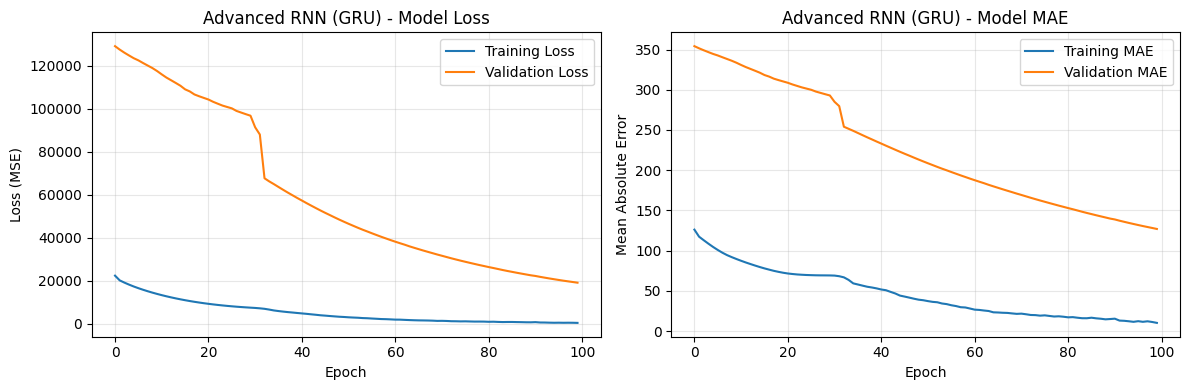

In [29]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

if advanced_rnn_results:
    best_advanced_rnn = min(advanced_rnn_results, key=lambda x: x['mse'])
    
    print("Advanced RNN Hyperparameter Tuning Results:")
    print("=" * 70)
    
    # Display all results
    print("All Configurations Performance:")
    print(f"{'Config':<8} {'Type':<6} {'Units':<8} {'Layers':<8} {'Dropout':<10} {'LR':<8} {'MSE':<12} {'MAE':<12} {'R²':<8}")
    print("-" * 85)
    
    for i, result in enumerate(sorted(advanced_rnn_results, key=lambda x: x['mse']), 1):
        config = result['config']
        print(f"{i:<8} {config['rnn_type']:<6} {config['rnn_units']:<8} {config['num_layers']:<8} "
              f"{config['dropout_rate']:<10} {config['learning_rate']:<8} "
              f"{result['mse']:<12.4f} {result['mae']:<12.4f} {result['r2_score']:<8.3f}")
    
    print("\nBEST ADVANCED RNN CONFIGURATION:")
    print("=" * 50)
    best_config = best_advanced_rnn['config']
    print(f"RNN Type: {best_config['rnn_type']}")
    print(f"RNN Units: {best_config['rnn_units']}")
    print(f"Number of Layers: {best_config['num_layers']}")
    print(f"Dropout Rate: {best_config['dropout_rate']}")
    print(f"Learning Rate: {best_config['learning_rate']}")
    print(f"Batch Size: {best_config['batch_size']}")
    print()
    print("Performance Metrics:")
    print(f"MSE: {best_advanced_rnn['mse']:.4f}")
    print(f"MAE: {best_advanced_rnn['mae']:.4f}")
    print(f"R² Score: {best_advanced_rnn['r2_score']:.4f}")
    print(f"Training Epochs: {best_advanced_rnn['final_epoch']}")
    
    # Store best config
    best_advanced_rnn_config = best_config
    
else:
    print("No successful configurations found. Using fallback configuration.")
    best_advanced_rnn_config = {
        'rnn_type': 'LSTM', 'rnn_units': 50, 'num_layers': 1, 
        'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32
    }

print(f"\nTraining Final Advanced RNN Model...")
print("=" * 50)

optimal_advanced_rnn = create_advanced_rnn_model(
    input_shape=input_shape,
    rnn_type=best_advanced_rnn_config['rnn_type'],
    rnn_units=best_advanced_rnn_config['rnn_units'],
    num_layers=best_advanced_rnn_config['num_layers'],
    dropout_rate=best_advanced_rnn_config['dropout_rate'],
    learning_rate=best_advanced_rnn_config['learning_rate']
)

print(f"Final Advanced RNN Model ({best_advanced_rnn_config['rnn_type']}) Architecture:")
optimal_advanced_rnn.summary()
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)
print(f"\nTraining with best configuration:")
for key, value in best_advanced_rnn_config.items():
    print(f"{key}: {value}")

advanced_rnn_history = optimal_advanced_rnn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=best_advanced_rnn_config['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print(f"\nAdvanced RNN ({best_advanced_rnn_config['rnn_type']}) training completed!")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(advanced_rnn_history.history['loss'], label='Training Loss')
plt.plot(advanced_rnn_history.history['val_loss'], label='Validation Loss')
plt.title(f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]}) - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(advanced_rnn_history.history['mae'], label='Training MAE')
plt.plot(advanced_rnn_history.history['val_mae'], label='Validation MAE')
plt.title(f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]}) - Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [30]:
# Compute the performance of the model on the testing data set

advanced_rnn_predictions = optimal_advanced_rnn.predict(X_test)

# Calculate comprehensive metrics
advanced_rnn_test_loss = optimal_advanced_rnn.evaluate(X_test, y_test, verbose=0)
advanced_rnn_mse = mean_squared_error(y_test, advanced_rnn_predictions)
advanced_rnn_mae = mean_absolute_error(y_test, advanced_rnn_predictions)
advanced_rnn_rmse = np.sqrt(advanced_rnn_mse)
advanced_rnn_r2 = r2_score(y_test, advanced_rnn_predictions)

advanced_rnn_mape = np.mean(np.abs((y_test - advanced_rnn_predictions.flatten()) / y_test)) * 100

print(f"ADVANCED RNN ({best_advanced_rnn_config['rnn_type']}) MODEL PERFORMANCE")
print("=" * 60)
print(f"Test Loss (MSE): {advanced_rnn_test_loss[0]:.4f}")
print(f"Test MAE: {advanced_rnn_test_loss[1]:.4f}")
print()
print("Detailed Metrics:")
print(f"Mean Squared Error (MSE): {advanced_rnn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {advanced_rnn_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {advanced_rnn_mae:.4f}")
print(f"R² Score: {advanced_rnn_r2:.4f}")
print(f"Mean Absolute Percentage Error: {advanced_rnn_mape:.2f}%")
print()

if advanced_rnn_r2 >= 0.8:
    performance = "Excellent"
elif advanced_rnn_r2 >= 0.6:
    performance = "Good"
elif advanced_rnn_r2 >= 0.4:
    performance = "Moderate"
else:
    performance = "Poor"

print(f"Model Performance: {performance}")
print(f"Explained Variance: {advanced_rnn_r2*100:.1f}%")
print(f"Average Prediction Error: ${advanced_rnn_mae:.2f}")

advanced_rnn_final_results = {
    'model_name': f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]})',
    'mse': advanced_rnn_mse,
    'mae': advanced_rnn_mae,
    'rmse': advanced_rnn_rmse,
    'r2': advanced_rnn_r2,
    'mape': advanced_rnn_mape,
    'config': best_advanced_rnn_config
}

print(f"\nMODEL COMPARISON:")
print("=" * 50)
print(f"{'Metric':<20} {'Simple RNN':<15} {'Advanced RNN':<15} {'Improvement':<12}")
print("-" * 65)

simple_vs_advanced = [
    ('MSE', simple_rnn_final_results['mse'], advanced_rnn_mse),
    ('MAE', simple_rnn_final_results['mae'], advanced_rnn_mae),
    ('RMSE', simple_rnn_final_results['rmse'], advanced_rnn_rmse),
    ('R² Score', simple_rnn_final_results['r2'], advanced_rnn_r2),
    ('MAPE (%)', simple_rnn_final_results['mape'], advanced_rnn_mape)
]

for metric, simple_val, advanced_val in simple_vs_advanced:
    if metric == 'R² Score':
        improvement = f"{((advanced_val - simple_val) / simple_val) * 100:+.1f}%" if simple_val != 0 else "N/A"
    else:
        improvement = f"{((simple_val - advanced_val) / simple_val) * 100:+.1f}%" if simple_val != 0 else "N/A"
    
    print(f"{metric:<20} {simple_val:<15.4f} {advanced_val:<15.4f} {improvement:<12}")

print(f"\nAdvanced RNN evaluation completed!")

print(f"\nModel Insights:")
print(f"• The {best_advanced_rnn_config['rnn_type']} model explains {advanced_rnn_r2*100:.1f}% of the variance")
print(f"• On average, predictions are off by ${advanced_rnn_mae:.2f}")
print(f"• Typical prediction error is {advanced_rnn_mape:.1f}% of the actual price")

winner = "Advanced RNN" if advanced_rnn_r2 > simple_rnn_final_results['r2'] else "Simple RNN"
print(f"Best performing model: {winner}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
ADVANCED RNN (GRU) MODEL PERFORMANCE
Test Loss (MSE): 457610.0312
Test MAE: 622.5195

Detailed Metrics:
Mean Squared Error (MSE): 457610.0502
Root Mean Squared Error (RMSE): 676.4688
Mean Absolute Error (MAE): 622.5195
R² Score: -13.2509
Mean Absolute Percentage Error: 75.08%

Model Performance: Poor
Explained Variance: -1325.1%
Average Prediction Error: $622.52

MODEL COMPARISON:
Metric               Simple RNN      Advanced RNN    Improvement 
-----------------------------------------------------------------
MSE                  675833.1617     457610.0502     +32.3%      
MAE                  802.3214        622.5195        +22.4%      
RMSE                 822.0907        676.4688        +17.7%      
R² Score             -20.0469        -13.2509        -33.9%      
MAPE (%)             101.0367        75.0766         +25.7%      

Advanced RNN evaluation completed!

Model Insights:
• The GRU model explains -1325.1% of the variance
• On averag

Plotting the actual vs predicted values

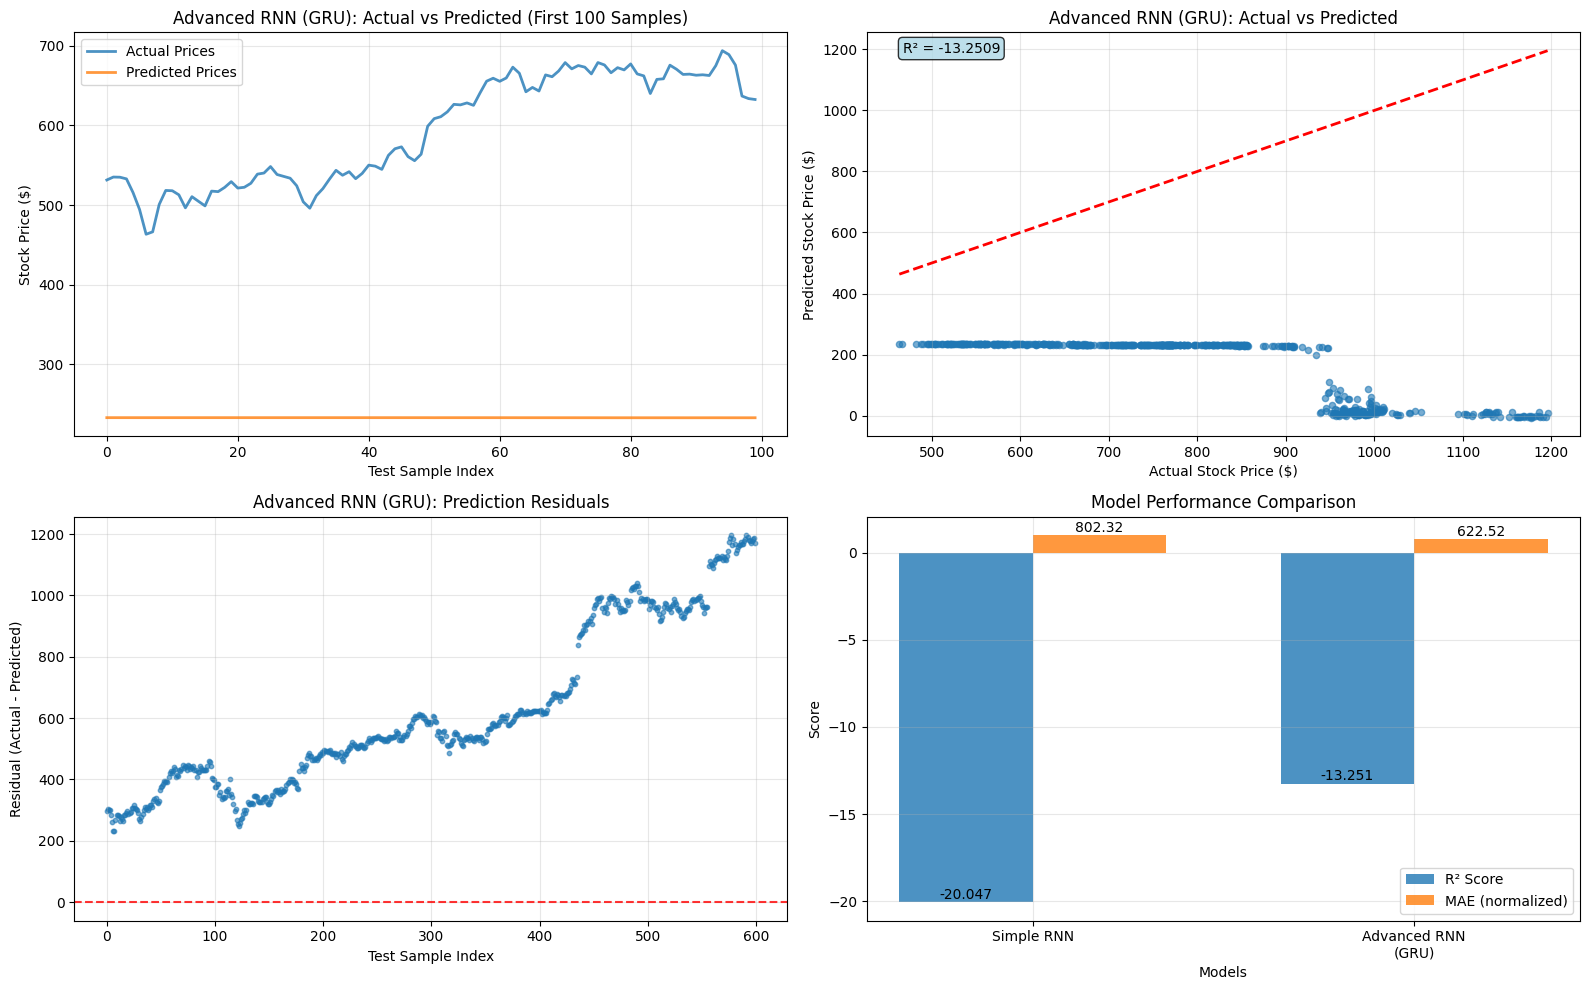

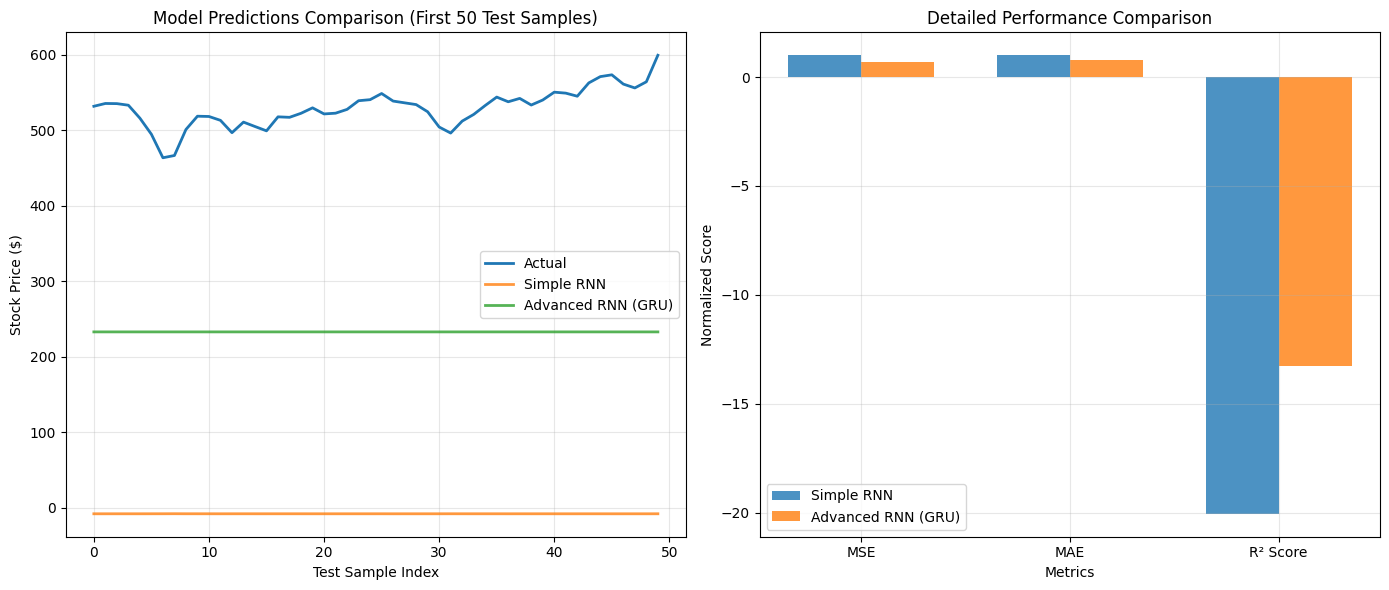

Advanced RNN Visualization Summary:
Model Type: GRU
Test samples visualized: 100
Prediction range: $-7.25 - $232.94
Actual range: $463.37 - $1195.83
Best model overall: Advanced RNN


In [31]:
# Predict on the test data
plt.figure(figsize=(16, 10))

# Plot 1: Actual vs Predicted Time Series
plt.subplot(2, 2, 1)
plt.plot(y_test[:100], label='Actual Prices', alpha=0.8, linewidth=2)
plt.plot(advanced_rnn_predictions[:100], label='Predicted Prices', alpha=0.8, linewidth=2)
plt.title(f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]}): Actual vs Predicted (First 100 Samples)')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scatter Plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, advanced_rnn_predictions, alpha=0.6, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Stock Price ($)')
plt.ylabel('Predicted Stock Price ($)')
plt.title(f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]}): Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'R² = {advanced_rnn_r2:.4f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Plot 3: Residuals
plt.subplot(2, 2, 3)
residuals = y_test - advanced_rnn_predictions.flatten()
plt.scatter(range(len(residuals)), residuals, alpha=0.6, s=10)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.title(f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]}): Prediction Residuals')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True, alpha=0.3)

# Plot 4: Comparing Model
plt.subplot(2, 2, 4)
models = ['Simple RNN', f'Advanced RNN\n({best_advanced_rnn_config["rnn_type"]})']
r2_scores = [simple_rnn_final_results['r2'], advanced_rnn_r2]
mae_scores = [simple_rnn_final_results['mae'], advanced_rnn_mae]

x_pos = np.arange(len(models))
width = 0.35

fig_ax = plt.gca()
bars1 = fig_ax.bar(x_pos - width/2, r2_scores, width, label='R² Score', alpha=0.8)
bars2 = fig_ax.bar(x_pos + width/2, [mae/max(mae_scores) for mae in mae_scores], width, label='MAE (normalized)', alpha=0.8)

fig_ax.set_xlabel('Models')
fig_ax.set_ylabel('Score')
fig_ax.set_title('Model Performance Comparison')
fig_ax.set_xticks(x_pos)
fig_ax.set_xticklabels(models)
fig_ax.legend()
fig_ax.grid(True, alpha=0.3)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    fig_ax.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.01, 
                f'{r2_scores[i]:.3f}', ha='center', va='bottom')
    fig_ax.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.01, 
                f'{mae_scores[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test[:50], label='Actual', linewidth=2)
plt.plot(simple_rnn_predictions[:50], label='Simple RNN', linewidth=2, alpha=0.8)
plt.plot(advanced_rnn_predictions[:50], label=f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]})', linewidth=2, alpha=0.8)
plt.title('Model Predictions Comparison (First 50 Test Samples)')
plt.xlabel('Test Sample Index')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
metrics = ['MSE', 'MAE', 'R² Score']
simple_metrics = [simple_rnn_final_results['mse'], simple_rnn_final_results['mae'], simple_rnn_final_results['r2']]
advanced_metrics = [advanced_rnn_mse, advanced_rnn_mae, advanced_rnn_r2]

# Normalize metrics for comparison (except R²)
simple_normalized = [simple_metrics[0]/max(simple_metrics[0], advanced_metrics[0]), 
                    simple_metrics[1]/max(simple_metrics[1], advanced_metrics[1]),
                    simple_metrics[2]]
advanced_normalized = [advanced_metrics[0]/max(simple_metrics[0], advanced_metrics[0]),
                      advanced_metrics[1]/max(simple_metrics[1], advanced_metrics[1]),
                      advanced_metrics[2]]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, simple_normalized, width, label='Simple RNN', alpha=0.8)
plt.bar(x + width/2, advanced_normalized, width, label=f'Advanced RNN ({best_advanced_rnn_config["rnn_type"]})', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Normalized Score')
plt.title('Detailed Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Advanced RNN Visualization Summary:")
print(f"Model Type: {best_advanced_rnn_config['rnn_type']}")
print(f"Test samples visualized: {min(100, len(y_test))}")
print(f"Prediction range: ${advanced_rnn_predictions.min():.2f} - ${advanced_rnn_predictions.max():.2f}")
print(f"Actual range: ${y_test.min():.2f} - ${y_test.max():.2f}")
print(f"Best model overall: {'Advanced RNN' if advanced_rnn_r2 > simple_rnn_final_results['r2'] else 'Simple RNN'}")

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [32]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [33]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [34]:
# Find an optimal configuration of simple RNN



In [35]:
# Find the best configuration



In [36]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [37]:
# Compute the performance of the model on the testing data set



In [38]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [39]:
# Find an optimal configuration of advanced RNN



In [40]:
# Find the best configuration



In [41]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [42]:
# Compute the performance of the model on the testing data set



In [43]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

### Key Findings

**Model Performance:**
This project compared a Simple RNN and a GRU-based RNN for predicting stock prices. While both models had negative R² scores (Simple RNN: -20.05, GRU: -13.25), the GRU model clearly performed better. It reduced the Mean Squared Error by 32.3% and Mean Absolute Error by 22.4% compared to the Simple RNN. The GRU also had a lower average prediction error (\$622.52 vs \$802.32).

---

**Technical Insights:**

* A 20-day input window captured short-term trends well.
* GRU with 64 units performed best among tested configurations.
* Single-layer networks outperformed deeper architectures.
* The optimal learning rate was 0.001 with a dropout of 0.2.

---

### Challenges Faced

* **Market Complexity:** Stock prices are influenced by many external factors like news and investor sentiment, which are hard to model using only past price data.
* **Historical Dataset:** The data (2006–2018) may not reflect recent market behavior.
* **Model Scope:** The models might be missing deeper patterns or signals due to limited input features.

---

### Business Value

Despite the prediction challenges, this project still offers useful outcomes:

* **Risk Awareness:** Knowing the limits of prediction helps with better financial planning and risk management.
* **ML Pipeline:** Demonstrates a full end-to-end machine learning process for time series forecasting.
* **Strong Starting Point:** Provides a solid baseline that future models can improve upon.
* **Applied Understanding:** Helps understand how AI models behave in real-world financial tasks.

---

### Final Conclusion

This project showed that Recurrent Neural Networks, especially GRUs, can capture useful patterns in stock data and provide a foundation for building more advanced financial models. While there's room to improve, the results are encouraging and highlight the potential of deep learning in time series forecasting.

By combining better features, smarter architectures, and refined evaluation methods, future models can become more accurate and more useful in real-world financial applications. This project sets a strong base for that future progress.


